# Understanding the Objective
**The main goal of your analysis is to derive insights around if a fellow willultimately be placed at a company and how long until a placement can be expected .**

**Import Libraries**

In [508]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


**Import** **dataset**

In [509]:
uploaded = files.upload()


Saving Data_Pathrise.xlsx to Data_Pathrise (9).xlsx


**Read the data**

In [510]:
df = pd.read_excel('Data_Pathrise.xlsx')

**Data Understanding**

In [511]:
df.head()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


**Assess data**

In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

**Cleaning Data**

**According to the domain knowledge, there are several factors that are singnificantly important to find a job such as : Work experience  ,Level of education, Job position , ....**

 **In this part , it is highly apppreciated to clean the data efficiently **

In [513]:
df['work_authorization_status'].fillna('missing value' , inplace = True)
df['work_authorization_status'].value_counts()

Citizen           1104
F1 Visa/OPT        644
missing value      284
Green Card         184
F1 Visa/CPT        132
Other              112
H1B                 48
Canada Citizen      24
STEM OPT             8
Not Authorized       4
Name: work_authorization_status, dtype: int64

In [514]:
df = df[~df['work_authorization_status'].str.contains('missing value')]
df=df[df['work_authorization_status'] != 'Not Authorized']

In [515]:
def author(x) :
  if ('Citizen' in x) or ('Canada Citizen' in x) or ('Green Card' in x) :
    return 'Authorized'
  elif ('F1 Visa/CPT' in x) or ('F1 Visa/OPT' in x) :
    return 'Visa'
  else :
    return 'other'

In [516]:
df['work_authorization_status']= df['work_authorization_status'].apply(author)

(array([0, 1, 2]),
 [Text(0, 0, 'Authorized'), Text(1, 0, 'Visa'), Text(2, 0, 'other')])

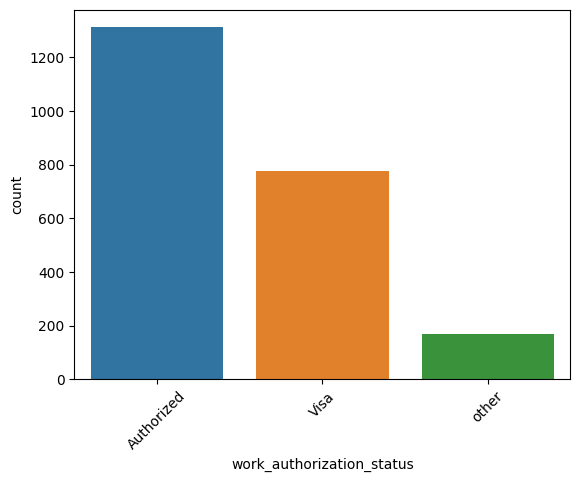

In [517]:
sns.countplot(x = 'work_authorization_status' , data = df)
plt.xticks(rotation = 45)

In [518]:
df['primary_track'].fillna('missing value' , inplace = True)
df['primary_track'].value_counts()

SWE          1489
PSO           292
Design        249
Data          219
Web             5
Marketing       2
Name: primary_track, dtype: int64

<Axes: xlabel='primary_track', ylabel='count'>

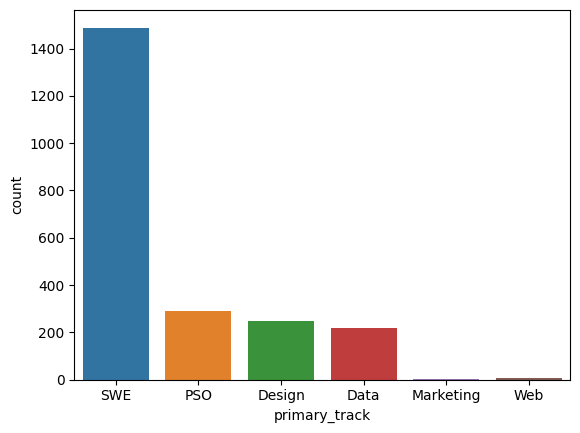

In [519]:
sns.countplot( x = 'primary_track' , data = df)

<Axes: xlabel='program_duration_days'>

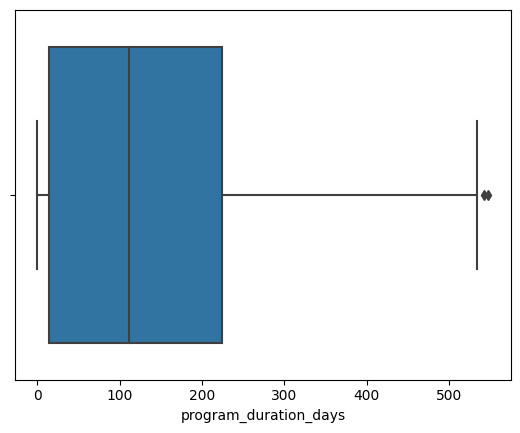

In [521]:
sns.boxplot( x = 'program_duration_days' , data = df)

In [524]:
df['program_duration_days'].fillna('missing value' , inplace = True)

# **If a fellow is unable to find a job within a year after joining Pathrise,his/her contract is terminated**

In [525]:
df = df[df['program_duration_days'] != 'missing value']
df = df[df['program_duration_days'] <= 365]
df['program_duration_days']= df['program_duration_days'].astype(int)

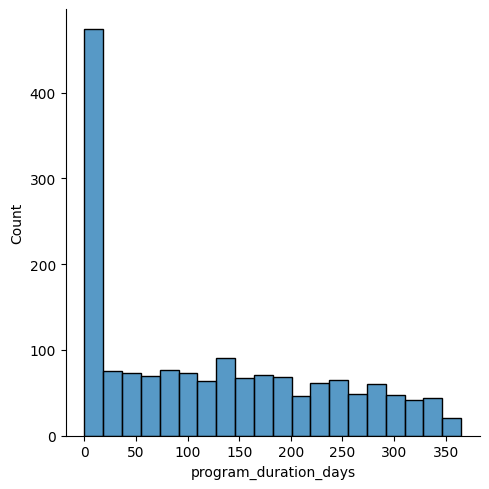

In [526]:
sns.displot(x = 'program_duration_days' , data = df , bins = 20)

In [528]:
df['professional_experience'].fillna('missing value' , inplace = True)
df['professional_experience'].value_counts()

1-2 years             545
Less than one year    412
3-4 years             370
5+ years              176
missing value         133
Name: professional_experience, dtype: int64

In [529]:
df = df[~df['professional_experience'].str.contains('missing value')]

In [530]:
def pro_ex(x):
  if ('Less than one year' in x) or ('missing value' in x):
    return 'intern'
  elif ('1-2 years' in x) or ('3-4 years'in x) :
    return 'Junior'
  else :
    return 'Senior'

In [531]:
df['professional_experience'] = df['professional_experience'].apply(pro_ex)

<Axes: xlabel='professional_experience', ylabel='count'>

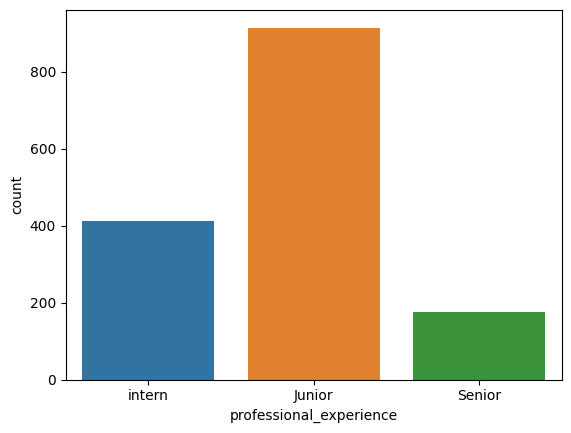

In [532]:
sns.countplot( x = 'professional_experience' , data = df)

In [533]:
df['highest_level_of_education'].fillna('missing value' , inplace = True)
df['highest_level_of_education'].value_counts()

Bachelor's Degree                   810
Master's Degree                     460
Some College, No Degree              87
Doctorate or Professional Degree     79
missing value                        34
GED or equivalent                    12
High School Graduate                 11
Some High School                     10
Name: highest_level_of_education, dtype: int64

In [534]:
#df = df[~df['highest_level_of_education'].str.contains('missing value')]

In [535]:
def degree_level(x) :
  if "Bachelor's Degree" in x :
    return 'BS'
  elif "Master's Degree" in x :
    return 'MS'
  elif 'Doctorate or Professional Degree' in x :
    return 'PHD'
  elif 'Some College, No Degree' in x :
    return 'college degree'
  else :
    return 'other'

In [536]:
df['highest_level_of_education'] = df['highest_level_of_education'].apply(degree_level)

<Axes: xlabel='highest_level_of_education', ylabel='count'>

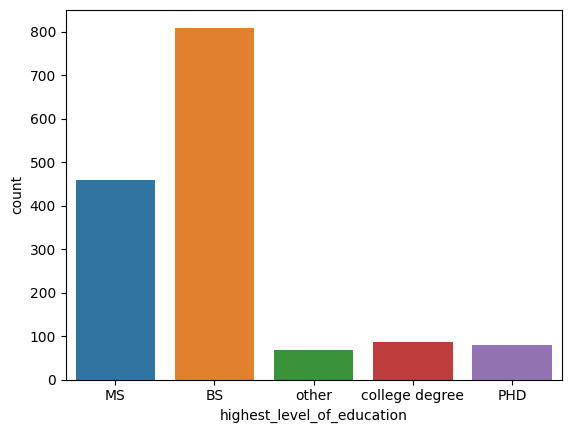

In [537]:
sns.countplot(x = 'highest_level_of_education' , data = df)

In [538]:
df['employment_status '].fillna('missing value' , inplace = True)
df['employment_status '].value_counts()

Student               440
Unemployed            399
Employed Full-Time    256
Employed Part-Time    157
missing value         145
Contractor            106
Name: employment_status , dtype: int64

In [539]:
#df = df[df['employment_status '] != 'missing value']

In [540]:
def emploee(x) :
  if ('Student' in x) or ('Unemploed' in x) :
    return 'Unemploed'
  else :
    return 'Employed'

In [541]:
df['employment_status '] = df['employment_status '].apply(emploee)

<Axes: xlabel='employment_status ', ylabel='count'>

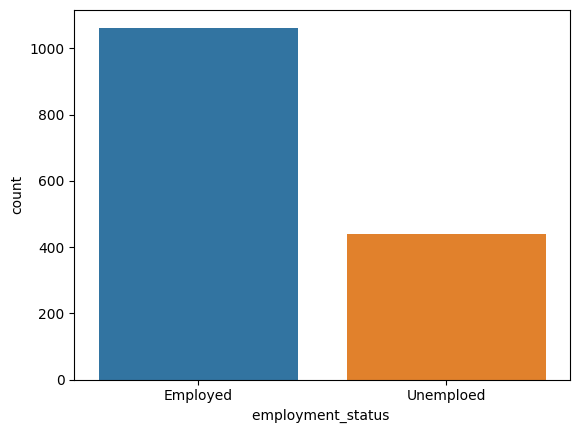

In [542]:
sns.countplot( x = 'employment_status ' , data = df)

In [543]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1503 entries, 2 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1503 non-null   int64  
 1   pathrise_status              1503 non-null   object 
 2   primary_track                1503 non-null   object 
 3   cohort_tag                   1498 non-null   object 
 4   program_duration_days        1503 non-null   int64  
 5   placed                       1503 non-null   int64  
 6   employment_status            1503 non-null   object 
 7   highest_level_of_education   1503 non-null   object 
 8   length_of_job_search         1452 non-null   object 
 9   biggest_challenge_in_search  1490 non-null   object 
 10  professional_experience      1503 non-null   object 
 11  work_authorization_status    1503 non-null   object 
 12  number_of_interviews         1359 non-null   float64
 13  number_of_applicat

In [544]:
cleaned_df = df[['highest_level_of_education', 'professional_experience' , 'program_duration_days' ,
'work_authorization_status','primary_track' , 'placed' , 'employment_status ']]

In [545]:
# in this part we have a cleaned data . now we can reach the goal .
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1503 entries, 2 to 2543
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   highest_level_of_education  1503 non-null   object
 1   professional_experience     1503 non-null   object
 2   program_duration_days       1503 non-null   int64 
 3   work_authorization_status   1503 non-null   object
 4   primary_track               1503 non-null   object
 5   placed                      1503 non-null   int64 
 6   employment_status           1503 non-null   object
dtypes: int64(2), object(5)
memory usage: 93.9+ KB


# **Exploratory Data Analysis (EDA)**

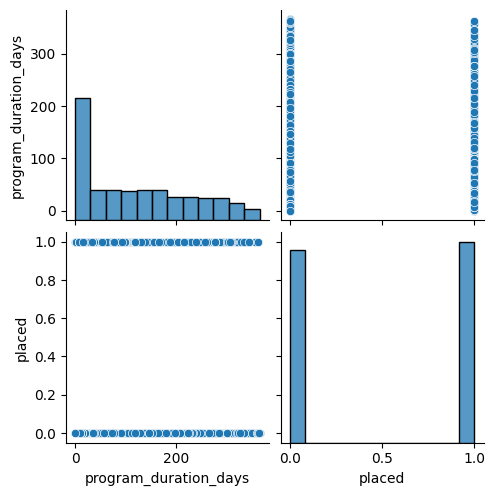

In [546]:
sns.pairplot(cleaned_df)

<Axes: xlabel='program_duration_days', ylabel='placed'>

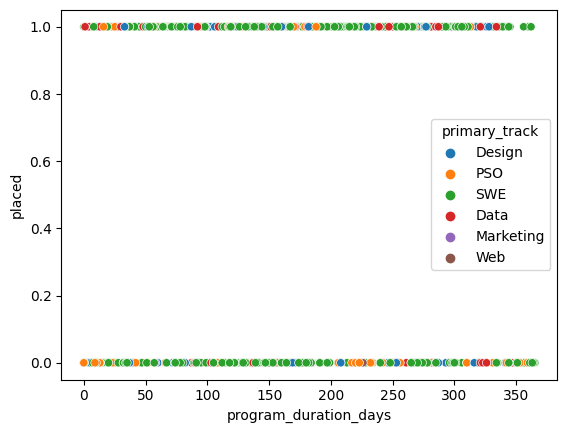

In [581]:
sns.scatterplot(x = 'program_duration_days' , y = 'placed' , data = cleaned_df , hue = 'primary_track')

# **Feature Engineering**

In [548]:
preprocessed_df = pd.get_dummies(cleaned_df , columns = ['highest_level_of_education' , 'professional_experience' ,
                                                         'work_authorization_status' ,'primary_track' , 'employment_status ' ])

In [549]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1503 entries, 2 to 2543
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   program_duration_days                      1503 non-null   int64
 1   placed                                     1503 non-null   int64
 2   highest_level_of_education_BS              1503 non-null   uint8
 3   highest_level_of_education_MS              1503 non-null   uint8
 4   highest_level_of_education_PHD             1503 non-null   uint8
 5   highest_level_of_education_college degree  1503 non-null   uint8
 6   highest_level_of_education_other           1503 non-null   uint8
 7   professional_experience_Junior             1503 non-null   uint8
 8   professional_experience_Senior             1503 non-null   uint8
 9   professional_experience_intern             1503 non-null   uint8
 10  work_authorization_status_Authorized       1503 

In [550]:
# Responding to first question : If a fellow will ultimately be placed at a company ?
# independent variable called 'y' is : 'PLaced'
# dependent variable is the others

In [551]:
y = preprocessed_df['placed']

In [552]:
x= preprocessed_df.drop(columns = 'placed')

# **Modeling**

In [553]:
from sklearn.model_selection import train_test_split

In [554]:
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size= .3 , random_state= 101)

In [555]:
from sklearn.linear_model import LogisticRegression

In [556]:
logreg = LogisticRegression()

In [557]:
logreg.fit(x_train , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [558]:
prediction = logreg.predict(x_test)

# **Evaluation**

In [559]:
from sklearn.metrics import confusion_matrix

In [560]:
confusion_matrix(y_test , prediction)

array([[154,  74],
       [ 82, 141]])

In [561]:
from sklearn.metrics import classification_report

In [562]:
print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

           0       0.65      0.68      0.66       228
           1       0.66      0.63      0.64       223

    accuracy                           0.65       451
   macro avg       0.65      0.65      0.65       451
weighted avg       0.65      0.65      0.65       451



In [563]:
from sklearn.metrics import accuracy_score

In [564]:
accuracy_score(y_test , prediction)

0.6541019955654102

# ** Responding to second question : how long until a placement can be expected ؟.**

In [565]:
preprocessed_df = pd.get_dummies(cleaned_df , columns = ['highest_level_of_education' , 'professional_experience' ,
                                                         'work_authorization_status' ,'primary_track' , 'employment_status ' ])

In [566]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1503 entries, 2 to 2543
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   program_duration_days                      1503 non-null   int64
 1   placed                                     1503 non-null   int64
 2   highest_level_of_education_BS              1503 non-null   uint8
 3   highest_level_of_education_MS              1503 non-null   uint8
 4   highest_level_of_education_PHD             1503 non-null   uint8
 5   highest_level_of_education_college degree  1503 non-null   uint8
 6   highest_level_of_education_other           1503 non-null   uint8
 7   professional_experience_Junior             1503 non-null   uint8
 8   professional_experience_Senior             1503 non-null   uint8
 9   professional_experience_intern             1503 non-null   uint8
 10  work_authorization_status_Authorized       1503 

In [567]:
preprocessed_df = preprocessed_df[preprocessed_df['placed'] == 1]

In [568]:
preprocessed_df = preprocessed_df.drop(columns= 'placed')

In [569]:
y = preprocessed_df['program_duration_days']

In [570]:
x = preprocessed_df.drop(columns = 'program_duration_days')

In [571]:
from sklearn.model_selection import train_test_split

In [572]:
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size= .4 , random_state= 101)

In [573]:
from sklearn.linear_model import LinearRegression

In [574]:
#instantiate the model
lr = LinearRegression()

In [575]:
lr.fit(x_train , y_train)

LinearRegression()

In [576]:
prediction = lr.predict(x_test)

# **Evaluation**

In [577]:
residual = prediction - y_test

<ipython-input-578-2ae57dbbec52>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual , bins = 30 )


<Axes: xlabel='program_duration_days', ylabel='Density'>

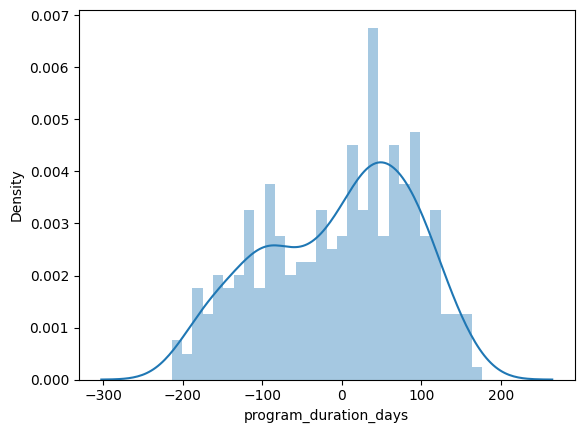

In [578]:
sns.distplot(residual , bins = 30 )

In [579]:
from sklearn import metrics

In [580]:
print('MEA' , metrics.mean_absolute_error(y_test , prediction))

MEA 78.1986970684039
